In [1]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [7]:
df = pd.read_csv("datos_nu_1.csv")
df.head(4)

,Unnamed: 0,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count
0,3,847,47,This shirt is very flattering to all due to th...,5,1,6
1,4,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4
2,5,858,39,I aded this in my basket at hte last mintue to...,5,1,1
3,6,858,39,"I ordered this in carbon for store pick up, an...",4,1,4


In [15]:
df_1 = pd.read_csv("datos_proyect.csv")

In [16]:
df_1.shape

(23486, 11)

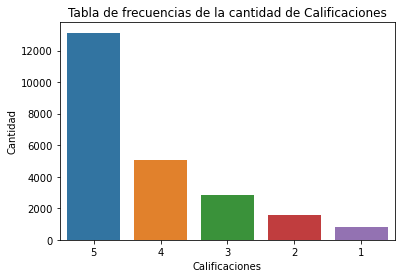

In [17]:
sns.countplot(x="Rating", data=df_1,order=df_1["Rating"].value_counts().index)
plt.title("Tabla de frecuencias de la cantidad de Calificaciones")
plt.ylabel("Cantidad")
plt.xlabel("Calificaciones");

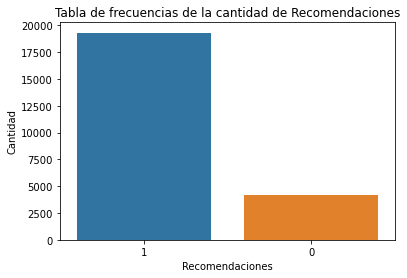

In [19]:
sns.countplot(x="Recommended IND", data=df_1,order=df_1["Recommended IND"].value_counts().index)
plt.title("Tabla de frecuencias de la cantidad de Recomendaciones")
plt.ylabel("Cantidad")
plt.xlabel("Recomendaciones");

In [8]:
df.shape

(10732, 7)

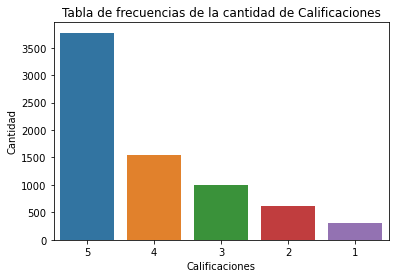

In [5]:
sns.countplot(x="Rating", data=df,order=df["Rating"].value_counts().index)
plt.title("Tabla de frecuencias de la cantidad de Calificaciones")
plt.ylabel("Cantidad")
plt.xlabel("Calificaciones");

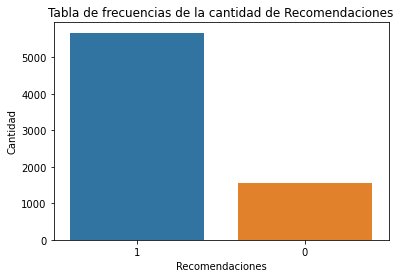

In [6]:
sns.countplot(x="Recommended_IND", data=df,order=df["Recommended_IND"].value_counts().index)
plt.title("Tabla de frecuencias de la cantidad de Recomendaciones")
plt.ylabel("Cantidad")
plt.xlabel("Recomendaciones");

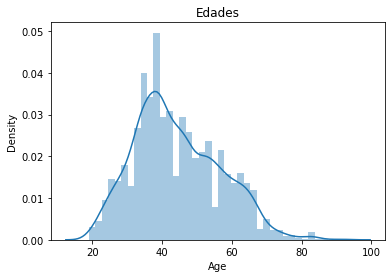

In [59]:
sns.distplot(df.Age)
plt.title("Edades")
plt.ylabel("Density");

# Intento 1: Cluster con PCA

In [20]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [21]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df["Review_Text"].values)
features = vec.transform(df["Review_Text"].values)

In [22]:
cls = MiniBatchKMeans(n_clusters=2, random_state=1)
cls.fit(features)

MiniBatchKMeans(n_clusters=2, random_state=1)

In [23]:
type(cls)

sklearn.cluster._kmeans.MiniBatchKMeans

In [24]:
cls.predict(features)
cls.labels_
print(len(cls.labels_))

10732


In [25]:
pca = PCA(n_components=2, random_state=1)
reduced_features = pca.fit_transform(features.toarray())

In [26]:
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

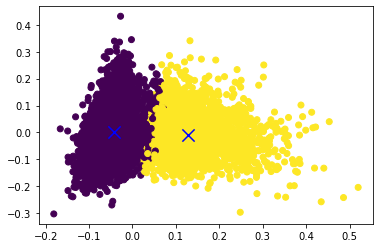

In [27]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [28]:
from sklearn.metrics import homogeneity_score
homogeneity_score(df["Recommended_IND"], cls.predict(features))

0.0004720323240659595

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.0042510631525260805

# Intento 2: Clasificador SVC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [45]:
df = pd.read_csv("datos_nu_1.csv")
df.head(4)

,Unnamed: 0,Clothing_ID,Age,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count
0,3,847,47,This shirt is very flattering to all due to th...,5,1,6
1,4,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4
2,5,858,39,I aded this in my basket at hte last mintue to...,5,1,1
3,6,858,39,"I ordered this in carbon for store pick up, an...",4,1,4


In [46]:
df.shape

(10732, 7)

In [47]:
cat = list(df.Recommended_IND.unique())
ran = list(["SI","NO"])
label = dict(zip(cat,ran))
label

{1: 'SI', 0: 'NO'}

In [48]:
df["Recomendacion"] = df["Recommended_IND"].map(label)

In [49]:
from io import StringIO
category_id_df = df[["Recomendacion",'Recommended_IND']].drop_duplicates().sort_values('Recommended_IND')

category_to_id = dict(category_id_df.values)

id_to_category = dict(category_id_df[["Recommended_IND","Recomendacion"]].values)


In [50]:
category_id_df

,Recomendacion,Recommended_IND
1,NO,0
0,SI,1


In [51]:
category_to_id

{'NO': 0, 'SI': 1}

In [52]:
id_to_category

{0: 'NO', 1: 'SI'}

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Review_Text).toarray()

labels = df.Recommended_IND

In [54]:
labels.head(4)

0    1
1    0
2    1
3    1
Name: Recommended_IND, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Review_Text'], df['Recommended_IND'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [56]:
print(clf.predict(count_vect.transform(["First of all, this is not pullover styling. there is a side zipper. i wouldn't have purchased it if i knew there was a side zipper because i have a large bust and side zippers are next to impossible for me."])))

[1]


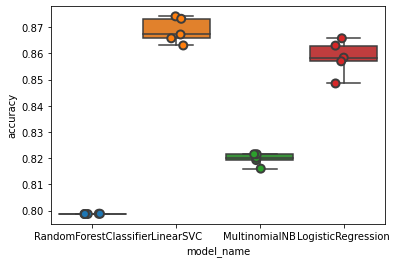

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [36]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.868711
LogisticRegression        0.858554
MultinomialNB             0.819698
RandomForestClassifier    0.798733
Name: accuracy, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

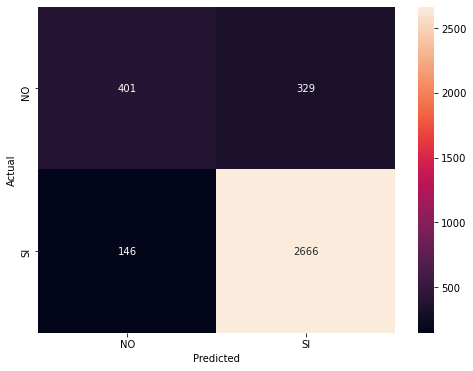

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Recomendacion.values, yticklabels=category_id_df.Recomendacion.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Recomendacion'].unique()))

              precision    recall  f1-score   support

          SI       0.73      0.55      0.63       730
          NO       0.89      0.95      0.92      2812

    accuracy                           0.87      3542
   macro avg       0.81      0.75      0.77      3542
weighted avg       0.86      0.87      0.86      3542



### Validacion cruzada (Evaluacion)

In [21]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [39]:
score_pred = metrics.accuracy_score(y_test, y_pred)
 
print("Metrica en Test", score_pred)

0.8658949745906268


In [42]:
kf = KFold(n_splits=5)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
 
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())

Metricas cross_validation [0.84075104 0.85257302 0.84700974 0.86161335 0.84075104]
Media de cross_validation 0.8485396383866481


# Intento 3: Cluster K means

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

text = tfidf.fit_transform(df.Review_Text)


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


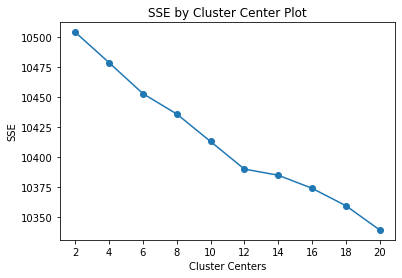

In [49]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [50]:
clusters = MiniBatchKMeans(n_clusters=3, random_state=20).fit_predict(text)

In [51]:
print(type(clusters))
clusters
max(clusters)

<class 'numpy.ndarray'>


2

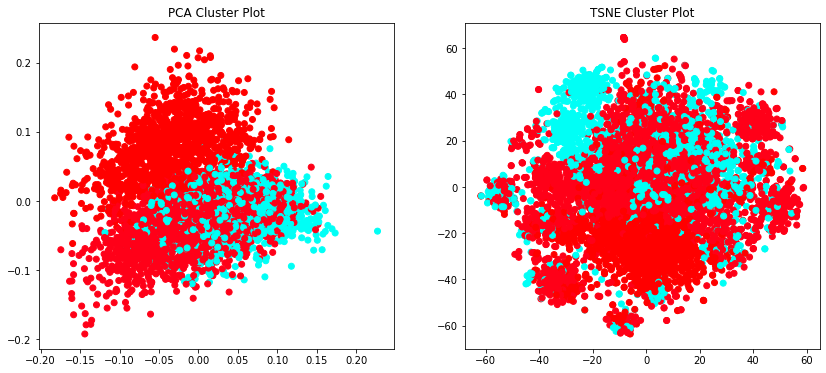

In [52]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=5000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=5000, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)